<a href="https://colab.research.google.com/github/fosterer/Troll-Classifier/blob/main/NLP_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Basic Libraries and Processing the dataset**

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import os
print(os.listdir("/content"))

['.config', 'Dataset for Detection of Cyber-Trolls.json', 'sample_data']


In [ ]:
df = pd.read_json('/content/Dataset for Detection of Cyber-Trolls.json', lines= True)
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [ ]:
df.shape

(20001, 3)

In [ ]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])

df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [ ]:
df.extras.unique()

array([nan])

In [ ]:
df["notes"] = df.annotation.apply(lambda x: x.get('notes'))
df.notes.unique()

array([''], dtype=object)

In [ ]:
newDf=df[["content","label"]]
newDf

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
newDf["label"].value_counts()

0    12179
1     7822
Name: label, dtype: int64

In [ ]:
#Remove the Null, missing values and reset the index
newDf=newDf.dropna()
newDf = newDf.reset_index(drop=True)
newDf

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


In [ ]:
#newDf = newDf.sample(frac=1).reset_index(drop=True) #shuffle


In [ ]:
newDf

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


**NLP Starts**

In [ ]:
newDf['pre_process'] = newDf['content'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

In [ ]:
from bs4 import BeautifulSoup
newDf['pre_process']=newDf['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
import re
newDf['pre_process']=newDf['pre_process'].apply(lambda x: re.sub(r"http\S+", "", x))

<ipython-input-289-b0acd87b7625>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newDf['pre_process']=newDf['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())
<ipython-input-289-b0acd87b7625>:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  newDf['pre_process']=newDf['pre_process'].apply(lambda x: BeautifulSoup(x).get_text())


In [ ]:
def contractions(s):
 s = re.sub(r"won't", "will not",s)
 s = re.sub(r"would't", "would not",s)
 s = re.sub(r"could't", "could not",s)
 s = re.sub(r"\'d", "would",s)
 s = re.sub(r"can\'t", "can not",s)
 s = re.sub(r"n\'t", " not", s)
 s= re.sub(r"\re", " are", s)
 s = re.sub(r"\'s", " is", s)
 s = re.sub(r"\'ll", " will", s)
 s = re.sub(r"\'t", " not", s)
 s = re.sub(r"\'ve", " have", s)
 s = re.sub(r"\'m", " am", s)
 return s
newDf['pre_process']=newDf['pre_process'].apply(lambda x:contractions(x))

In [ ]:
newDf['pre_process']=newDf['pre_process'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','', x) for x in nltk.word_tokenize(x)]))

In [ ]:
newDf['pre_process']=newDf['pre_process'].apply(lambda x: re.sub(' +', ' ', x))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
newDf['pre_process']=newDf['pre_process'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download(['punkt', 'wordnet'])

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
newDf['pre_process']=newDf['pre_process'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [ ]:
newDf

,content,label,pre_process
0,Get fucking real dude.,1,get fucking real dude
1,She is as dirty as they come and that crook ...,1,dirty come crook rengel dems fucking corrupt j...
2,why did you fuck it up. I could do it all day...,1,fuck could day let hour ping later sched writi...
3,Dude they dont finish enclosing the fucking s...,1,dude dont finish enclosing fucking shower hate...
4,WTF are you talking about Men? No men thats n...,1,wtf talking men men thats menage gay
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,dont complaining going
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,bahah yeah totally gon na get pissed talking m...
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,hahahahaha im evil mwahahahahahahahahaha
19999,What&;s something unique about Ohio? :),0,something unique ohio


**ML starts**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train, Y_test = train_test_split(newDf['pre_process'], newDf['label'], test_size=0.25, random_state=30)
print("Train: ",X_train.shape,Y_train.shape,"Test: ",(X_test.shape,Y_test.shape))

Train:  (15000,) (15000,) Test:  ((5001,), (5001,))


In [ ]:
print("TFIDF Vectorizer……")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train)
tf_x_test = vectorizer.transform(X_test)

TFIDF Vectorizer……


**SVM**

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0)

In [ ]:
clf.fit(tf_x_train,Y_train)

LinearSVC(random_state=0)

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [ ]:
report

{'0': {'precision': 0.9169085631349783,
  'recall': 0.8242009132420092,
  'f1-score': 0.8680865681896256,
  'support': 3066},
 '1': {'precision': 0.7599109131403118,
  'recall': 0.8816537467700258,
  'f1-score': 0.8162679425837319,
  'support': 1935},
 'accuracy': 0.8464307138572286,
 'macro avg': {'precision': 0.838409738137645,
  'recall': 0.8529273300060175,
  'f1-score': 0.8421772553866788,
  'support': 5001},
 'weighted avg': {'precision': 0.8561626217753142,
  'recall': 0.8464307138572286,
  'f1-score': 0.8480367700397747,
  'support': 5001}}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, y_test_pred))   #Results
print("Accuracy is: ",accuracy_score(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87      3066
           1       0.76      0.88      0.82      1935

    accuracy                           0.85      5001
   macro avg       0.84      0.85      0.84      5001
weighted avg       0.86      0.85      0.85      5001

Accuracy is:  0.8464307138572286


<Axes: >

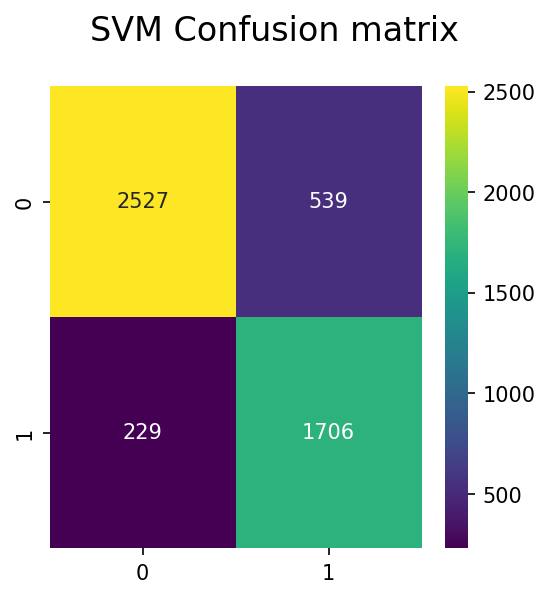

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('SVM Confusion matrix', size=16, y=1.00);
con = confusion_matrix(Y_test.tolist(), y_test_pred.tolist())
sns.heatmap(con, cmap='viridis', annot=True, fmt = 'd')

In [ ]:
sf=pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})
sf

,Actual,Predicted
16971,0,0
13954,0,0
10003,0,1
4190,1,1
5399,1,1
...,...,...
4891,1,1
19287,0,0
16096,0,0
12243,0,0


<ipython-input-307-371e03fae0e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
<ipython-input-307-371e03fae0e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color="b", label="Pred

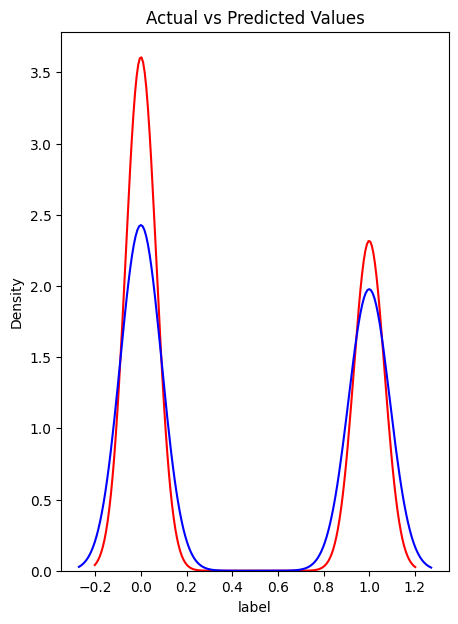

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

 **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000,solver='saga')

In [ ]:
clf.fit(tf_x_train,Y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [ ]:
y_test_pred=clf.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [ ]:
report

{'0': {'precision': 0.7785094283148758,
  'recall': 0.8483365949119374,
  'f1-score': 0.8119244576244733,
  'support': 3066},
 '1': {'precision': 0.7198795180722891,
  'recall': 0.6175710594315246,
  'f1-score': 0.6648122392211404,
  'support': 1935},
 'accuracy': 0.7590481903619276,
 'macro avg': {'precision': 0.7491944731935825,
  'recall': 0.732953827171731,
  'f1-score': 0.7383683484228069,
  'support': 5001},
 'weighted avg': {'precision': 0.7558241900986379,
  'recall': 0.7590481903619276,
  'f1-score': 0.7550034133112461,
  'support': 5001}}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, y_test_pred))   #Results
print("Accuracy is: ",accuracy_score(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      3066
           1       0.72      0.62      0.66      1935

    accuracy                           0.76      5001
   macro avg       0.75      0.73      0.74      5001
weighted avg       0.76      0.76      0.76      5001

Accuracy is:  0.7590481903619276


<Axes: >

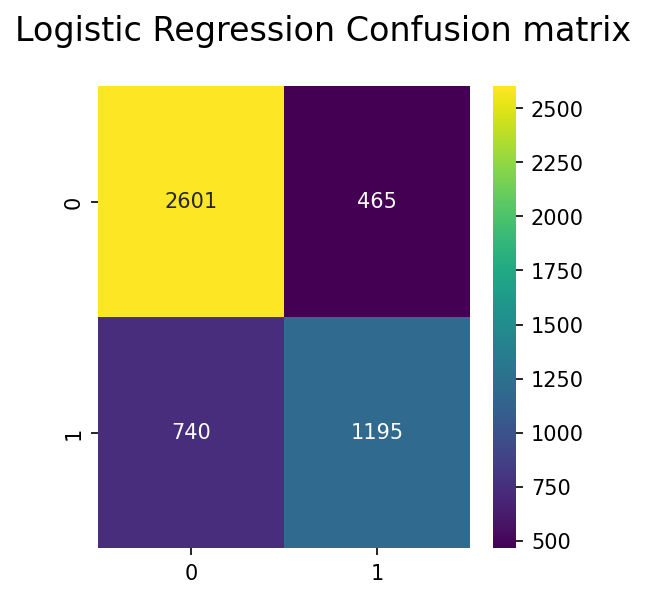

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Logistic Regression Confusion matrix', size=16, y=1.00);
con = confusion_matrix(Y_test.tolist(), y_test_pred.tolist())
sns.heatmap(con, cmap='viridis', annot=True, fmt = 'd')

In [ ]:
sf=pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})
sf

,Actual,Predicted
16971,0,0
13954,0,0
10003,0,1
4190,1,1
5399,1,0
...,...,...
4891,1,1
19287,0,0
16096,0,0
12243,0,0


<ipython-input-316-371e03fae0e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
<ipython-input-316-371e03fae0e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color="b", label="Pred

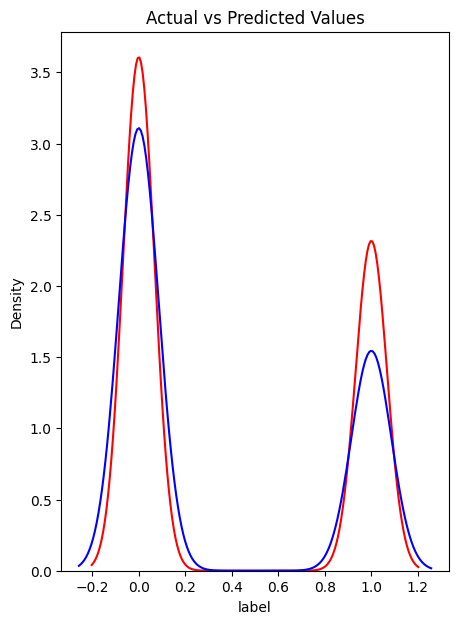

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
classifier = MultinomialNB()

In [ ]:
classifier.fit(tf_x_train,Y_train)

MultinomialNB()

In [ ]:
y_test_pred=classifier.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [ ]:
report

{'0': {'precision': 0.7631507222676479,
  'recall': 0.91324200913242,
  'f1-score': 0.8314773570898293,
  'support': 3066},
 '1': {'precision': 0.8003003003003003,
  'recall': 0.5509043927648579,
  'f1-score': 0.652586470768289,
  'support': 1935},
 'accuracy': 0.7730453909218157,
 'macro avg': {'precision': 0.781725511283974,
  'recall': 0.732073200948639,
  'f1-score': 0.7420319139290592,
  'support': 5001},
 'weighted avg': {'precision': 0.7775247341639052,
  'recall': 0.7730453909218157,
  'f1-score': 0.7622604274693172,
  'support': 5001}}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
print(classification_report(Y_test, y_test_pred))   #Results
print("Accuracy is: ",accuracy_score(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      3066
           1       0.80      0.55      0.65      1935

    accuracy                           0.77      5001
   macro avg       0.78      0.73      0.74      5001
weighted avg       0.78      0.77      0.76      5001

Accuracy is:  0.7730453909218157


<Axes: >

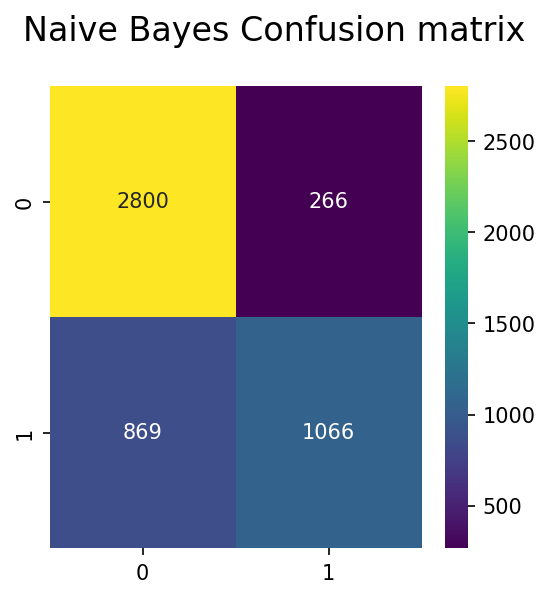

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Naive Bayes Confusion matrix', size=16, y=1.00);
con = confusion_matrix(Y_test.tolist(), y_test_pred.tolist())
sns.heatmap(con, cmap='viridis', annot=True, fmt = 'd')

In [ ]:
sf=pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})
sf

,Actual,Predicted
16971,0,0
13954,0,0
10003,0,0
4190,1,1
5399,1,0
...,...,...
4891,1,1
19287,0,0
16096,0,0
12243,0,0


<ipython-input-327-371e03fae0e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
<ipython-input-327-371e03fae0e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color="b", label="Pred

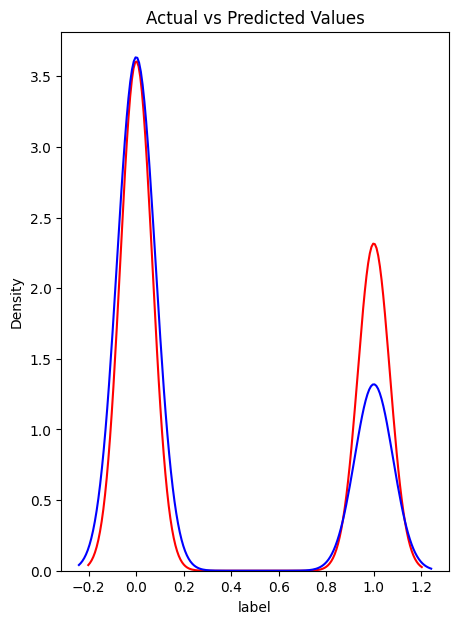

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RandomForestModel = RandomForestClassifier()

In [ ]:
RandomForestModel.fit(tf_x_train,Y_train)

RandomForestClassifier()

In [ ]:
y_test_pred=RandomForestModel.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)

In [ ]:
report

{'0': {'precision': 0.9554317548746518,
  'recall': 0.8949771689497716,
  'f1-score': 0.9242169080498485,
  'support': 3066},
 '1': {'precision': 0.8487552841709722,
  'recall': 0.9338501291989664,
  'f1-score': 0.8892716535433071,
  'support': 1935},
 'accuracy': 0.9100179964007199,
 'macro avg': {'precision': 0.902093519522812,
  'recall': 0.9144136490743691,
  'f1-score': 0.9067442807965778,
  'support': 5001},
 'weighted avg': {'precision': 0.9141562158201386,
  'recall': 0.9100179964007199,
  'f1-score': 0.9106957987776714,
  'support': 5001}}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, y_test_pred))   #Results
print("Accuracy is: ",accuracy_score(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      3066
           1       0.85      0.93      0.89      1935

    accuracy                           0.91      5001
   macro avg       0.90      0.91      0.91      5001
weighted avg       0.91      0.91      0.91      5001

Accuracy is:  0.9100179964007199


<Axes: >

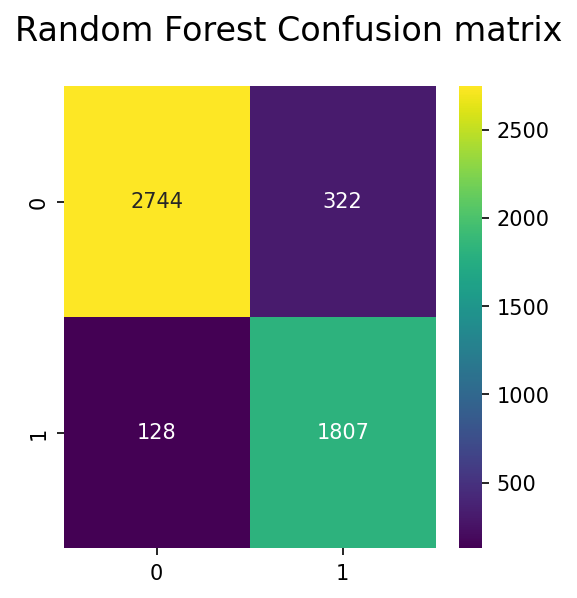

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('Random Forest Confusion matrix', size=16, y=1.00);
con = confusion_matrix(Y_test.tolist(), y_test_pred.tolist())
sns.heatmap(con, cmap='viridis', annot=True, fmt = 'd')

In [ ]:
sf=pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})
sf

,Actual,Predicted
16971,0,0
13954,0,0
10003,0,0
4190,1,1
5399,1,1
...,...,...
4891,1,1
19287,0,0
16096,0,0
12243,0,0


<ipython-input-337-371e03fae0e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
<ipython-input-337-371e03fae0e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color="b", label="Pred

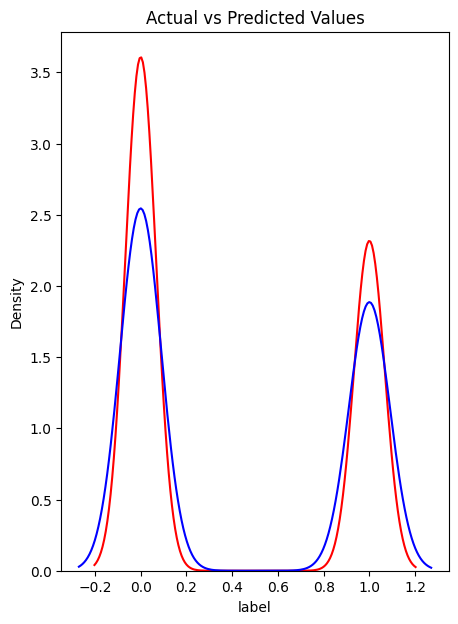

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

**LightGBM**

In [ ]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from lightgbm import LGBMClassifier
LgmClassifier = LGBMClassifier()
LgmClassifier.fit(tf_x_train, Y_train)

LGBMClassifier()

In [ ]:
y_test_pred=LgmClassifier.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'precision': 0.805699481865285,
  'recall': 0.8114807566862361,
  'f1-score': 0.8085797855053624,
  'support': 3066},
 '1': {'precision': 0.6978567694720335,
  'recall': 0.689922480620155,
  'f1-score': 0.6938669438669439,
  'support': 1935},
 'accuracy': 0.7644471105778844,
 'macro avg': {'precision': 0.7517781256686592,
  'recall': 0.7507016186531956,
  'f1-score': 0.7512233646861531,
  'support': 5001},
 'weighted avg': {'precision': 0.7639726975259645,
  'recall': 0.7644471105778844,
  'f1-score': 0.7641947927898376,
  'support': 5001}}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, y_test_pred))   #Results
print("Accuracy is: ",accuracy_score(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3066
           1       0.70      0.69      0.69      1935

    accuracy                           0.76      5001
   macro avg       0.75      0.75      0.75      5001
weighted avg       0.76      0.76      0.76      5001

Accuracy is:  0.7644471105778844


<Axes: >

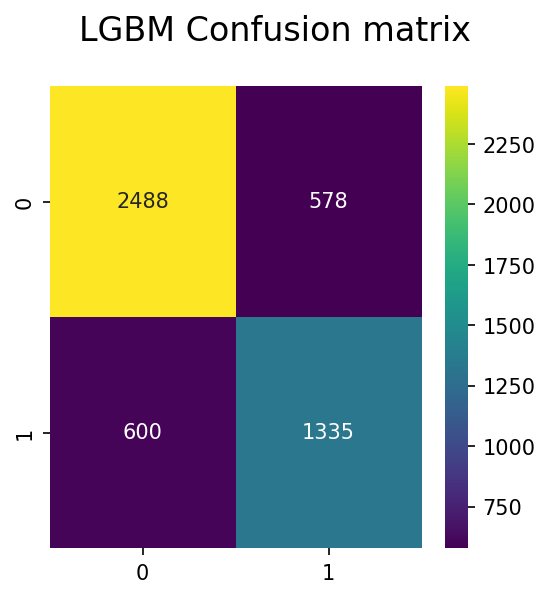

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('LGBM Confusion matrix', size=16, y=1.00);
con = confusion_matrix(Y_test.tolist(), y_test_pred.tolist())
sns.heatmap(con, cmap='viridis', annot=True, fmt = 'd')

In [ ]:
sf=pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})
sf

,Actual,Predicted
16971,0,0
13954,0,1
10003,0,1
4190,1,1
5399,1,1
...,...,...
4891,1,0
19287,0,0
16096,0,0
12243,0,0


<ipython-input-345-371e03fae0e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
<ipython-input-345-371e03fae0e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color="b", label="Pred

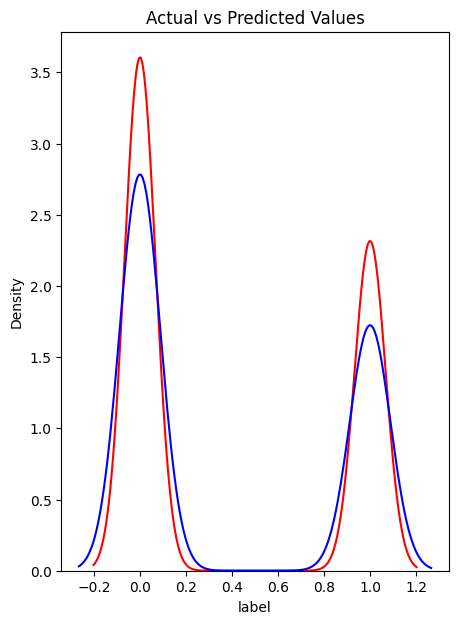

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()

**KNN Classifier**

In [ ]:
plt.style.use('ggplot')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model Y_test, y_test_pred
    knn.fit(tf_x_train,Y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(tf_x_train,Y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(tf_x_test, Y_test)

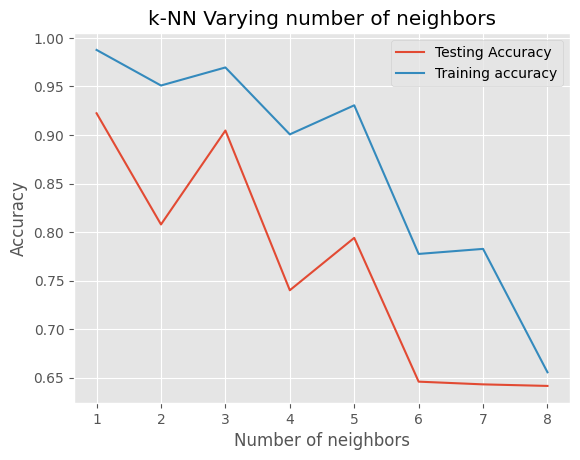

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=8)

In [ ]:
#Fit the model
knn.fit(tf_x_train,Y_train)

KNeighborsClassifier(n_neighbors=8)

In [ ]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(tf_x_test,Y_test)

0.6414717056588682

In [ ]:
y_test_pred=knn.predict(tf_x_test)

In [ ]:
from sklearn.metrics import classification_report
report=classification_report(Y_test, y_test_pred,output_dict=True)
report

{'0': {'precision': 0.6367934665807006,
  'recall': 0.9664057403783431,
  'f1-score': 0.7677160253918901,
  'support': 3066},
 '1': {'precision': 0.7040229885057471,
  'recall': 0.12661498708010335,
  'f1-score': 0.21462987297415678,
  'support': 1935},
 'accuracy': 0.6414717056588682,
 'macro avg': {'precision': 0.6704082275432238,
  'recall': 0.5465103637292232,
  'f1-score': 0.49117294918302346,
  'support': 5001},
 'weighted avg': {'precision': 0.6628060890412014,
  'recall': 0.6414717056588682,
  'f1-score': 0.5537144847143628,
  'support': 5001}}

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(Y_test, y_test_pred))   #Results
print("Accuracy is: ",accuracy_score(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      3066
           1       0.70      0.13      0.21      1935

    accuracy                           0.64      5001
   macro avg       0.67      0.55      0.49      5001
weighted avg       0.66      0.64      0.55      5001

Accuracy is:  0.6414717056588682


<Axes: >

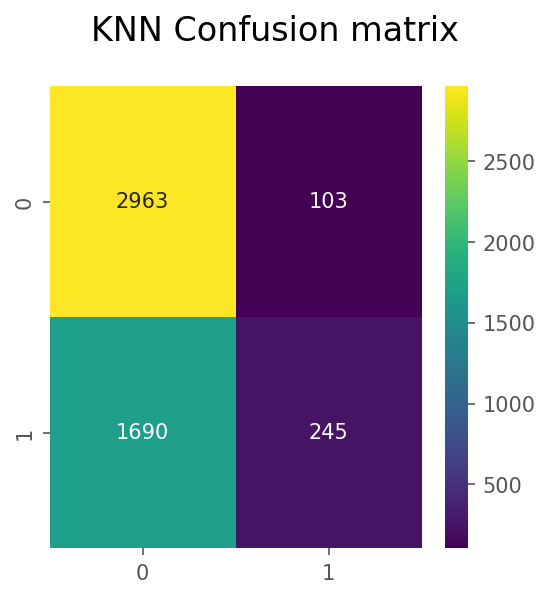

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(4, 4), dpi=150)
plt.suptitle('KNN Confusion matrix', size=16, y=1.00);
con = confusion_matrix(Y_test.tolist(), y_test_pred.tolist())
sns.heatmap(con, cmap='viridis', annot=True, fmt = 'd')

In [ ]:
sf=pd.DataFrame({'Actual':Y_test, 'Predicted':y_test_pred})
sf

,Actual,Predicted
16971,0,0
13954,0,0
10003,0,0
4190,1,0
5399,1,0
...,...,...
4891,1,0
19287,0,0
16096,0,0
12243,0,0


<ipython-input-357-371e03fae0e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
<ipython-input-357-371e03fae0e4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test_pred, hist=False, color="b", label="Pred

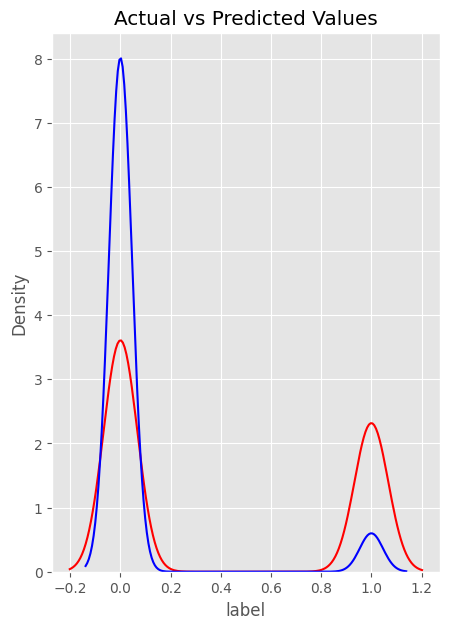

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(newDf['label'], hist=False, color="r", label="Actual Values")
sns.distplot(y_test_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Predicted Values')


plt.show()
plt.close()